# Validating the exact solutions 

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from analysis_functions import deterministic_solution

In [2]:
total_time = 0.500
dt = 0.00001
nt = int(total_time / dt)
time = np.linspace(0, total_time, num=nt)

#### Unit Activated

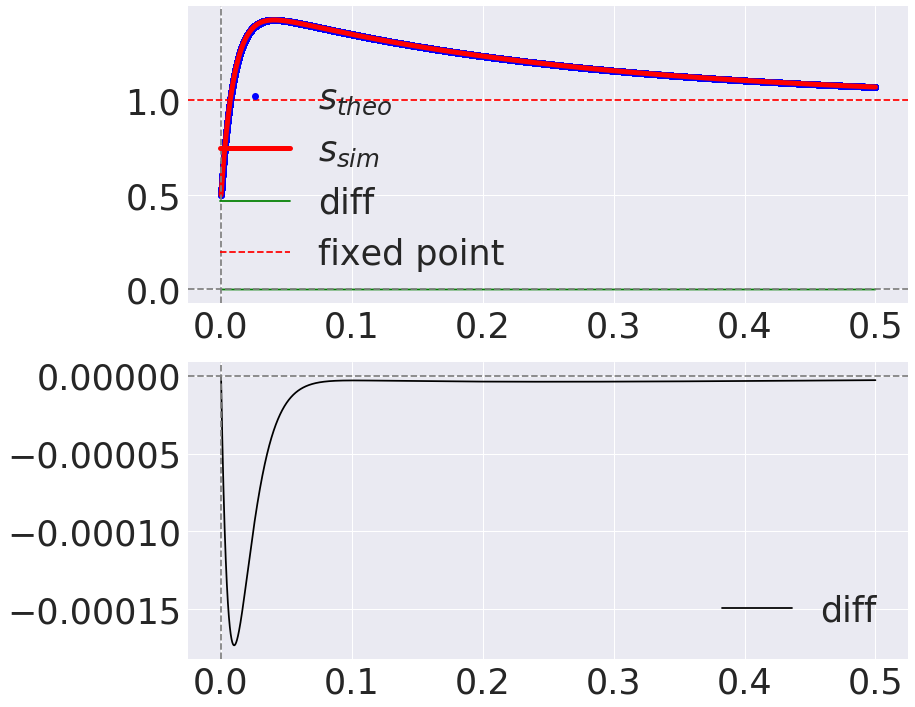

In [3]:
g_a = 1.0
w = 1.0
beta = 1.0
tau_s = 0.010
tau_a = 0.250
r = tau_s / tau_a
s0 = 0.5
a0 = 0.5

fix_point = beta + w - g_a
unit_active = True
s_theo = deterministic_solution(time, beta, w, tau_s, tau_a, g_a, s0, a0, unit_active)

s = np.zeros(nt)
a = np.zeros(nt)
s[0] = s0
a[0] = a0

for i in range(nt - 1):
    s[i + 1] = s[i] + (dt / tau_s) * (beta + w - g_a*a[i] - s[i])
    a[i + 1] = a[i] + (dt / tau_a) * (1.0 - a[i])
    
    
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(time, s_theo, 'o', color='blue', label=r'$s_{theo}$')
ax.plot(time, s, color='red', lw=5, label=r'$s_{sim}$')
ax.plot(time, s_theo - s, color='green', label='diff')

ax.axhline(fix_point, ls='--', color='red', label='fixed point')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend()

ax = fig.add_subplot(212)
ax.plot(time, s_theo - s, color='black', label='diff')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Unit not activated

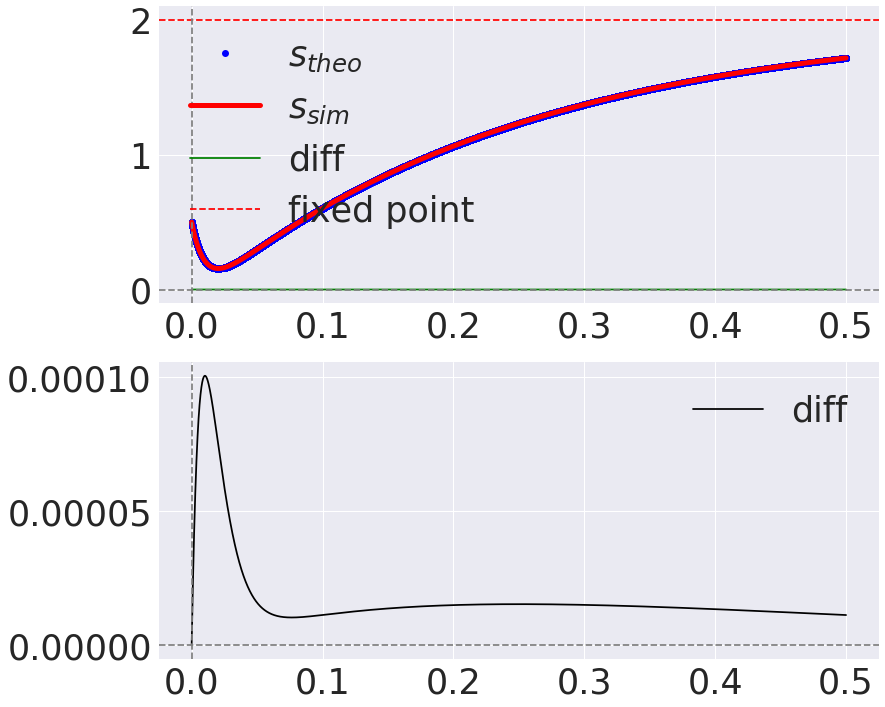

In [4]:
g_a = 1.0
w = 1.0
beta = 1.0
tau_s = 0.010
tau_a = 0.250
r = tau_s / tau_a
s0 = 0.5
a0 = 2.0


fix_point = beta + w
unit_active = False
s_theo = deterministic_solution(time, beta, w, tau_s, tau_a, g_a, s0, a0, unit_active)

s = np.zeros(nt)
a = np.zeros(nt)

s = np.zeros(nt)
a = np.zeros(nt)
s[0] = s0
a[0] = a0

for i in range(nt - 1):
    s[i + 1] = s[i] + (dt / tau_s) * (beta + w - g_a*a[i] - s[i])
    a[i + 1] = a[i] + (dt / tau_a) * (0 - a[i])
    
    
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(time, s_theo, 'o', color='blue', label=r'$s_{theo}$')
ax.plot(time, s, color='red', lw=5, label=r'$s_{sim}$')
ax.plot(time, s_theo - s, color='green', label='diff')

ax.axhline(fix_point, ls='--', color='red', label='fixed point')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

ax = fig.add_subplot(212)
ax.plot(time, s_theo - s, color='black', label='diff')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();